# Coursework 1 

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# Part B - Task 1

## Optimisation methods 

Hill Climbing and Gradient Ascent are both optimisation methods. As mentioned by Stuart Russell and Peter Norvig in *'Artificial Intelligence: A Modern Approach'*, optimisation algorithms try to solve a problem by finding the best state according to an objective function. The search space can be called state-space landscape which has a location defined by the state and a evaluation defined by the objective function. Both Hill Climbing and Gradient Ascent aim to find the highest peak in the landscape known as global maximum. By not keeping a record of their path and only maintaining the current sate and the value of the objective function, the algorithms become more memory efficient. 

### Hill Climbing 
The Hill Climbing algorithm belongs to the family of local search. It starts with an arbitrary state in the landscape and iterates or climbs in the direction of the higher value. The peak is reached when no neighbour has a higher value. Since the choice of the next neighbour is randomly and there is no record of the path, hill climbing is illustrated as trying to find the top of Mount Everest in a thick fog while suffering from amnesia. 

### Gradient Ascent
Gradient Ascent is similar to hill climbing but more deterministic. It starts with an arbitrary initial state as well but does not choose its neighbour stochastically. The next neighbour is determined by its gradient which points in the steepest direction uphill. This procedure is repeated until the gradient becomes zero which indicates a local or global maximum. However, the objective function might not be differentiable. In those cases, the empirical gradient is calculated.   

#### Objective functions 
The objective functions in the given code are:
- SimpleLandscape
- ComplexLandscape 

## Question 1

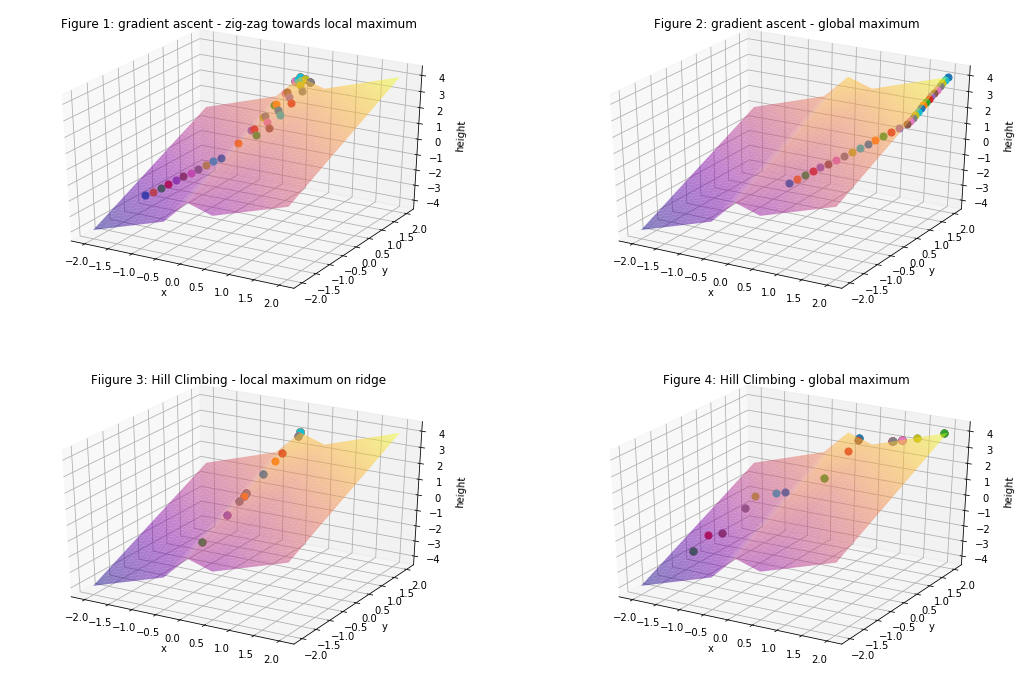

In [5]:
# Gradient Acsent 
LRate=0.1

fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(2,2,1, projection = '3d')
ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
ax.set_title('Figure 1: gradient ascent - zig-zag towards local maximum')

x = -1.5
y = -1 
StartPt = [x,y]
GradAscent(StartPt,NumSteps,LRate,True)

ax = fig.add_subplot(2,2,2, projection = '3d')
ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
ax.set_title('Figure 2: gradient ascent - global maximum')

x = 0.5
y = -1
StartPt = [x,y]
GradAscent(StartPt,NumSteps,LRate,True)


# Hill Climbing 
MaxMutate=1

ax = fig.add_subplot(2,2,3, projection = '3d')
ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
ax.set_title('Fiigure 3: Hill Climbing - local maximum on ridge')

x = 0
y = -1.5
StartPt = [x,y]
HillClimb(StartPt,NumSteps,MaxMutate,True)

ax = fig.add_subplot(2,2,4, projection = '3d')
ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2,2.025,0.025), SimpleLandscape)
ax.set_title('Figure 4: Hill Climbing - global maximum')

random.seed(1)
x = -1.5
y = -1
StartPt = [x,y]
g = HillClimb(StartPt,NumSteps,MaxMutate,True)

### Set-up
The global maximum is reached when the gradient is zero. However, the gradient vector or grad is 1,1 and not 0 at the global maximum. This is due to the 50% steepness of the landscape on the z-axis. Therefore, the decision whether a global maximum has been found or not is based on the highest value returned by the objective function.   
- The highest value returned by the SimpleLandscape function is 4 with x = 2 and y = 2 as state. 

### Obversations

The following observations are based on a <b>learning rate of 0.1</b>, and a  <b>mutation rate of 1</b>

1. Hill Climbing has a higher chance to reach the global maximum than gradient ascent.
2. Hill Climbing needs in average less iterations to reach the global maximum than gradient ascent. 

### Problems  Gradient Ascent and Hill Climbing

#### Local Maxima 
A local maximum is located at a peak that is lower than the global maximum. Hill climbing and gradient ascent algorithms that reach the vicinity of a local maximum will be stuck at the peak as shown figure 1 and 3. 

#### Ridges
Hill climbing moves in an axis-aligned direction since just either x or y is mutated at each iteration in order to be more stochastic. This results in a sequence of local maxima as shown in the figure 1. Gradient ascent on the other hand can move in any direction because both x and y are adjusted each iteration. 

#### Zig-Zag 
The gradient ascent moves towards the direction of the gradient. After each iteration the new gradient is always orthogonal to the previous direction as shown in figure 1. As a result, gradient ascent tends to zig-zag up the valley which is relative slow close the optimum.  



## Question 2 

Gradient Ascent: mean iteration of starting points that reach the global maximum: 21
Hill Climbing: mean iteration of starting points that reach the global maximum: 24


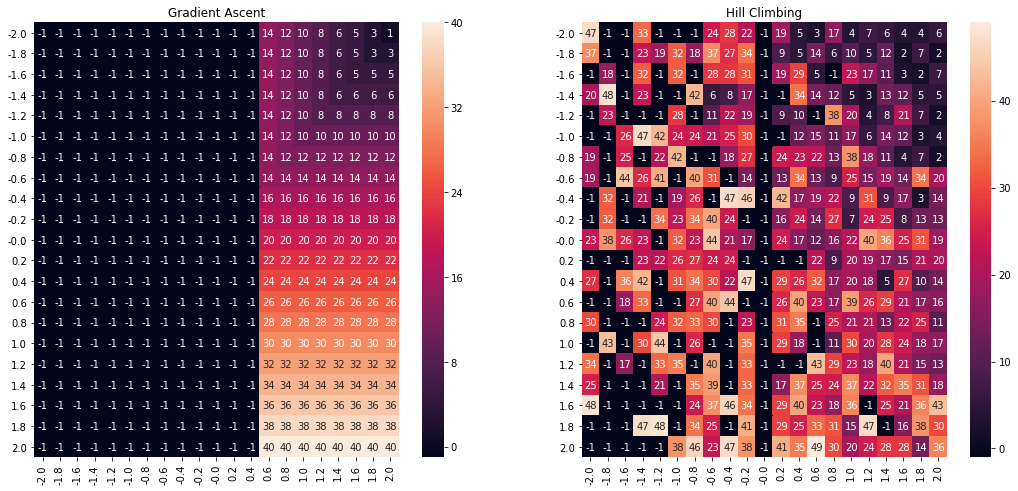

In [6]:
def plotHeatMap(algo,rate,annot,name):
    
    a = -2
    b = 2.1
    x_vector = np.arange(a,b,0.2)
    y_vector = np.arange(a,b,0.2)
    n = len(x_vector)
    total_iter = 0
    number_global = 0;
    searchSpace = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            StartPt = [x_vector[i],y_vector[j]]
            steps, globalOptimumReached,height = algo(StartPt,NumSteps,rate,False)
            if globalOptimumReached == 1:
                searchSpace[i,j] = steps
                total_iter += steps
                number_global += 1
            else:
                searchSpace[i,j] = -1

    x_vector = np.round(x_vector,2)
    y_vector = np.round(y_vector,2)
    transformed_search_space = np.flip(np.transpose(searchSpace),0)
    ax = sns.heatmap(transformed_search_space,annot=annot,xticklabels=x_vector, yticklabels=y_vector)
    ax.set_title(name)
    r = plt.yticks(rotation=0)
    mean_iter = total_iter / number_global
    return mean_iter

NumSteps = 50
LRate = 0.1
MaxMutate=1

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 8))

plt.subplot(1, 2, 1)
mean_iter = plotHeatMap(GradAscent,LRate,True,'Gradient Ascent')
print('Gradient Ascent: mean iteration of starting points that reach the global maximum:', round(mean_iter))

plt.subplot(1, 2, 2)
mean_iter = plotHeatMap(HillClimb,MaxMutate,True, 'Hill Climbing')
print('Hill Climbing: mean iteration of starting points that reach the global maximum:', round(mean_iter))

### Set-up:
- 400 states 
- MaxMutate = 1, LRate = 0.1
- A -1 or black square in the heatmap indicates that the state does not reach the global maximum 
- The colorful part displays how many steps it takes to reach the global maximum.   

### Analysis 
- The hill climbing heatmap shows a black line at x = 0 which represents the ridge in the landscape.
- The gradient ascent heatmap shows that states after the valley at x = 0.5 lead to the global maximum.
- Of all 400 states, 40% reach the global maximum with gradient ascent and around 75% with hill climbing. 

### Odd Results 
#### number of steps of hill climbing
The mean iteration of hill climbing is with around 24 higher than the mean iteration of gradient ascent with 21. This contradicts the observation where it seemed that hill climbing needs less steps to reach the global maximum. There are two reasons for that: 
  - If the new height of hill climbing is less than the current height than the new point is not plotted. Thus, the number of iterations is higher than there are points on the landscape.  
  - Hill climbing has more states that reach the global maximum but those are also further away. To overcome this problem, the algorithms are run again with a range of 0.5 (edge of the valley) to 2. The result is a ratio of 11:13 with gradient ascent still having less steps. This proves that the higher numbers of steps is mainly due to the first point mentioned.
  
#### horizontal and vertical lines in the heatmap 
Looking at the gradient ascent heatmap, the iterations from 40 to 16 appear to be horizontal while from 14 towards the lines appear to be horizontal and vertical. This is because of the situation that for example a state at from x = 0.6, y = -2 is equal far away form the global maximum as a state at y = -2, x = 0.6

## Question 3

In [7]:
def globalRate(algo,rate, complex_algo):
    
    n = 20
    if complex_algo:
        a = -3
        b = 7
    else:
        a = -2 
        b = 2
    
    x_vector = np.linspace(a,b,n)
    y_vector = np.linspace(a,b,n)
    total_iter = 0
    number_global = 0;
    searchSpace = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            StartPt = [x_vector[i],y_vector[j]]
            steps, globalOptimumReached,height = algo(StartPt,NumSteps,rate,False)
            if globalOptimumReached == 1:
                searchSpace[i,j] = steps
                total_iter += steps
                number_global += 1
            else:
                searchSpace[i,j] = -1
    
        
    return (total_iter / number_global), number_global

def plotIterGlobalRate(algo, rates, name, rate_name, complex_algo):
    
    for i in range(n_learn_rates):
        mean_iter, global_reached = globalRate(algo,rates[i],complex_algo)
        mean_iters[i] = mean_iter
        global_ratios[i] = global_reached / total_starting_points

    #fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.plot(rates,mean_iters, color='b')
    ax1.set_xlabel(rate_name)
    ax1.set_ylabel('iteration steps', color='b')
    ax1.set_title(name)

    ax2 = ax1.twinx()
    ax2.set_ylabel('global ratio', color='r')
    ax2.plot(rates,global_ratios, color='r')
    

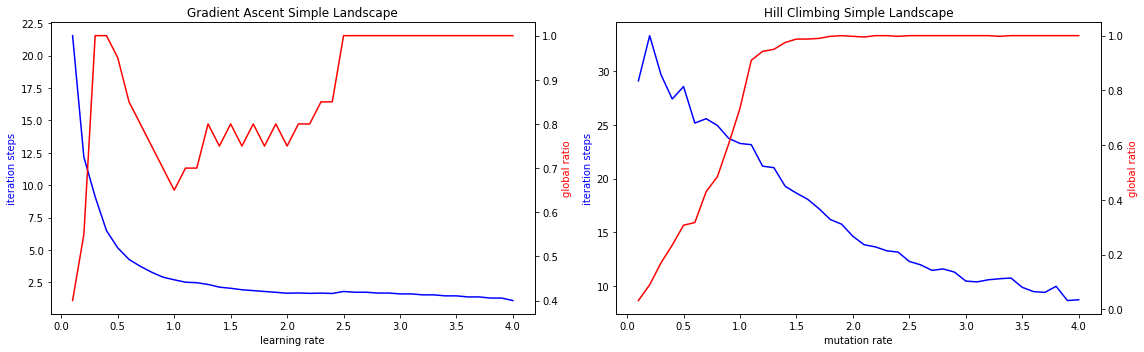

In [10]:
NumSteps = 50
total_starting_points = 400
n_learn_rates = 40

mean_iters = np.zeros(n_learn_rates)
global_ratios = np.zeros(n_learn_rates)

plt.subplots(nrows=1, ncols=2,figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
learning_rates = np.linspace(0.1,4,n_learn_rates)
plotIterGlobalRate(GradAscent, learning_rates,'Gradient Ascent Simple Landscape','learning rate',False)

ax1 = plt.subplot(1, 2, 2)
mutation_rates = np.linspace(0.1,4,n_learn_rates)
plotIterGlobalRate(HillClimb, mutation_rates,'Hill Climbing Simple Landscape', 'mutation rate',False)
plt.tight_layout()

### Set-up
- 400 states
- 40 different learning/mutations rates for each state
- Blue line: mean iteration of states which lead the global maximum
- Red line: global ratio = states which lead to the global maximum divided by 400

### Boundaries of the landscape
The figures above indicate that for example a learning or mutation rate of 3 lead to the global maximum. However, this is misleading since np.minimum() and np.maximum() prevent to leave the landscape and thus a relative high learning rate or mutation rate always results in the global maximum. 

### Analysis
- The higher the mutation rate, the more likely to find the global maximum
- The number of iterations of gradient ascent drops faster than those of hill climbing.
- The numbers of iterations of gradient ascent falls constantly while hill climbing iterations may increase because of the level of stochasticity. 

### The optimal learning rate
In general a smaller learning rate or step size is more likely to find the global maximum since the chance of choosing the right direction will be higher. However, this causes two problems: 
1. its more likely to be stuck in a local maximum 
2. needs more iteration steps 

Knowing that, finding the optimal learning rate is essential. In the simple landscape a learning rate of 0.5 for the gradient ascent seems to be ideal, reaching the global maximum 95% of the times with 5 as mean iteration. In conclusion, gradient ascent with an optimal learning rate performs better in a simple landscape than hill climbing.  

# Task 2

## Question 1

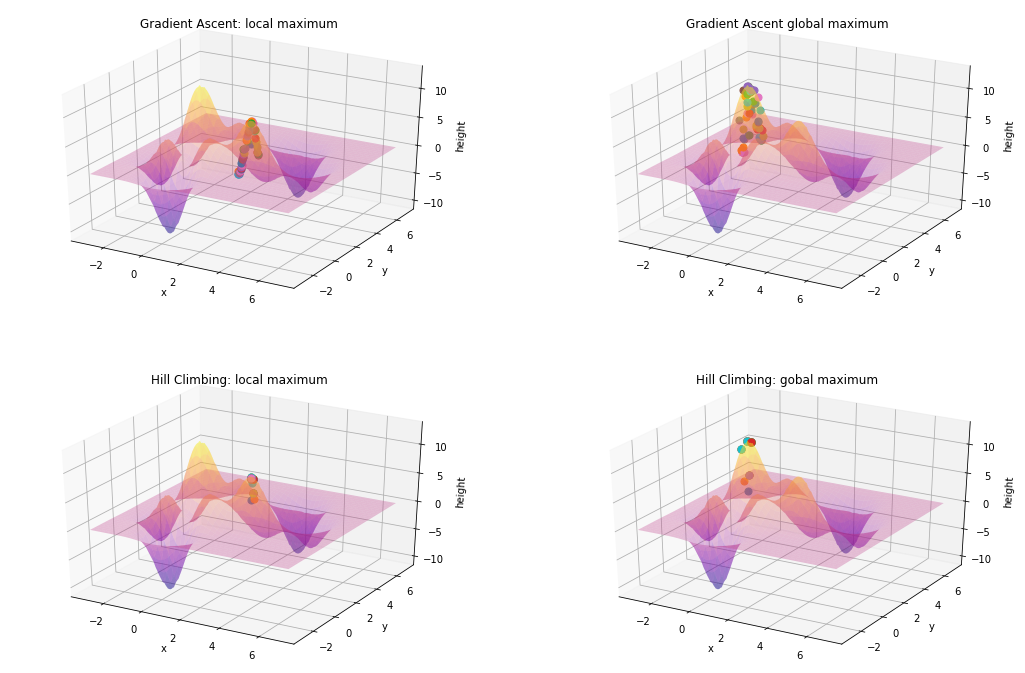

In [11]:
# Gradient Ascent 
NumSteps= 50
LRate = 0.1
MaxMutate = 1

random.seed(10)
fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(2,2,1, projection = '3d')
ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)
ax.set_title('Gradient Ascent: local maximum')

StartPt = [random.uniform(-3,7),random.uniform(-3,7)]
GradAscentComplex(StartPt,NumSteps,LRate,True)

random.seed(3)
ax = fig.add_subplot(2,2,2, projection = '3d')
ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)
ax.set_title('Gradient Ascent global maximum')

StartPt = [random.uniform(-3,7),random.uniform(-3,7)]
GradAscentComplex(StartPt,NumSteps,LRate,True)

# Hill Climbing
random.seed(10)
ax = fig.add_subplot(2,2,3, projection = '3d')
ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)
ax.set_title('Hill Climbing: local maximum')
StartPt = [random.uniform(-3,7),random.uniform(-3,7)]
g =HillClimbComplex(StartPt,NumSteps,MaxMutate,True)

random.seed(3)
ax = fig.add_subplot(2,2,4, projection = '3d')
ax = DrawSurface(fig, np.arange(-3,7.025,0.025), np.arange(-3,7.025,0.025), ComplexLandscape)
ax.set_title('Hill Climbing: gobal maximum')
StartPt = [random.uniform(-3,7),random.uniform(-3,7)]
g = HillClimbComplex(StartPt,NumSteps,MaxMutate,True)

### Complex Lanscape -  Convergence Criteria 
The global maximum in the complex landscape is indeterminable. A hill can be seen as a infinite number of layers getting smaller each layer. For this reason, the grad can only converge to zero and hill climbing will be never able to jump to the peak. One way to overcome this problem is to set a tolerance parameter. Having calculated the height several times, it appears that the global maximum is around 12.35. Nonetheless, for keeping it simple the tolerance parameter is going to be the number of iteration steps. In addition, if the term global maximum is used in the following descriptions, it means the highest value that could be determined.

### Set-up
LRate = 0.1, MaxMutate = 1, iterations = 50

### Observation 

In a complex landscape there are several hills and valleys, consequently the performance of gradient ascent and hill climbing is worse on a complex landscape than on a simple one. However, is seems like that hill climbing is more likely to find the global maximum with less iterations than gradient ascent. Its high mutation rate enables the hill climbing algorithm to jump to the peak. 

## Question 2

In [9]:
def plotHeatMapComplex(algo,rate,title):
    
    n = 20
    x_vector = np.linspace(-3,7,n)
    y_vector = np.linspace(-3,7,n)
    searchSpace = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            StartPt = [x_vector[i],y_vector[j]]
            iterations, globalReached, height = algo(StartPt,NumSteps,rate,False)
            searchSpace[i,j] = round(height,1)
            

    x_vector = np.round(x_vector,2)
    y_vector = np.round(y_vector,2)
    transformed_search_space = np.flip(np.transpose(searchSpace),0)
    ax = sns.heatmap(transformed_search_space, annot=True,xticklabels=x_vector, yticklabels=y_vector)
    ax.set_title(title)
    r = plt.yticks(rotation=0) 

### Gradient Ascent

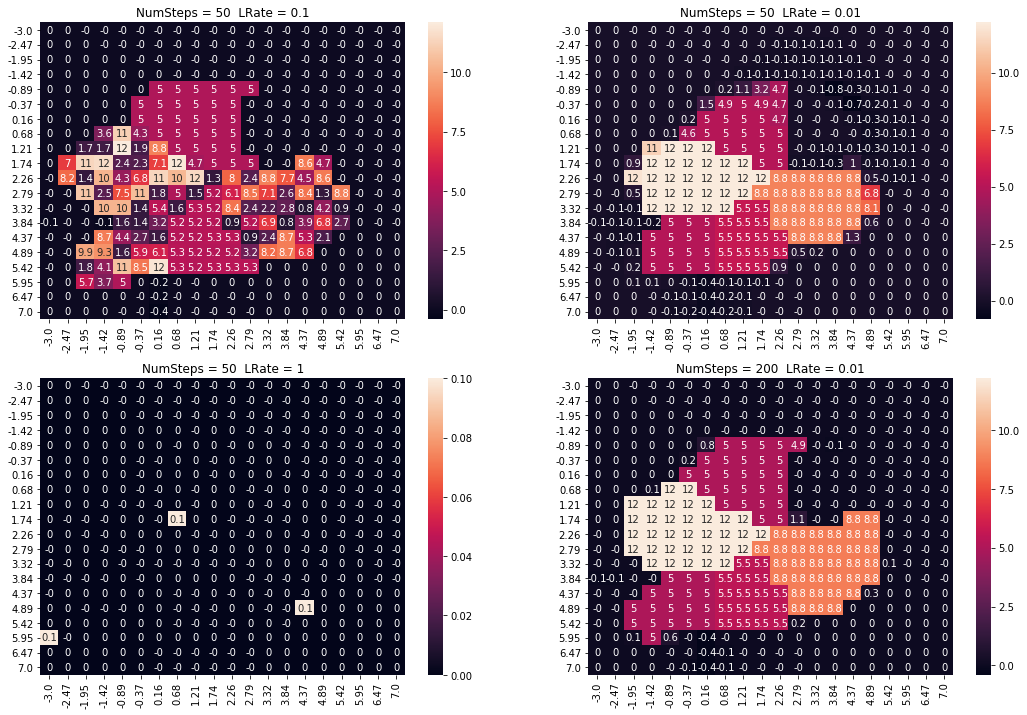

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(18, 12))

NumSteps = 50
LRate = 0.1
plt.subplot(2, 2, 1)
plotHeatMapComplex(GradAscentComplex,LRate,'NumSteps = 50  LRate = 0.1')

NumSteps = 50
LRate = 0.01
plt.subplot(2, 2, 2)
plotHeatMapComplex(GradAscentComplex,LRate,'NumSteps = 50  LRate = 0.01')

NumSteps = 50
LRate = 1
plt.subplot(2, 2, 3)
plotHeatMapComplex(GradAscentComplex,LRate,'NumSteps = 50  LRate = 1')

NumSteps = 200
LRate = 0.01
plt.subplot(2, 2, 4)
plotHeatMapComplex(GradAscentComplex,LRate,'NumSteps = 200  LRate = 0.01')

### Hill Climbing 

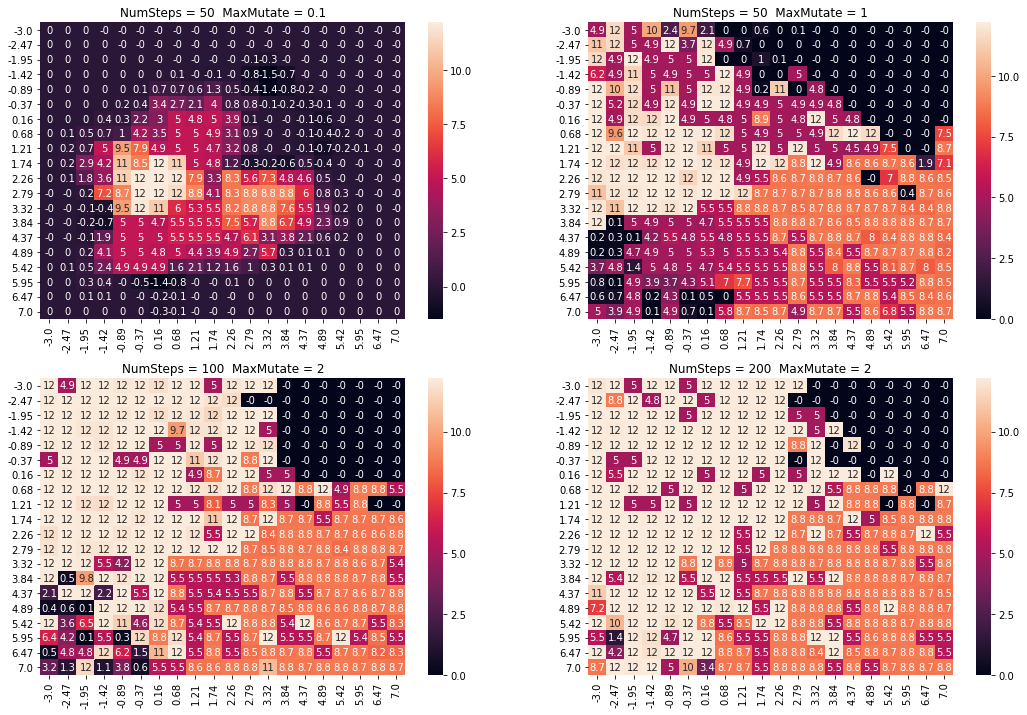

In [399]:
plt.subplots(nrows=2, ncols=2,figsize=(18, 12))

NumSteps = 50
MaxMutate = 0.1
plt.subplot(2, 2, 1)
plotHeatMapComplex(HillClimbComplex,MaxMutate,'NumSteps = 50  MaxMutate = 0.1')

NumSteps = 50
MaxMutate = 1
plt.subplot(2, 2, 2)
plotHeatMapComplex(HillClimbComplex,MaxMutate,'NumSteps = 50  MaxMutate = 1')

NumSteps = 100
MaxMutate = 2
plt.subplot(2, 2, 3)
plotHeatMapComplex(HillClimbComplex,MaxMutate,'NumSteps = 100  MaxMutate = 2')

NumSteps = 200
MaxMutate = 2
plt.subplot(2, 2, 4)
plotHeatMapComplex(HillClimbComplex,MaxMutate,'NumSteps = 200  MaxMutate = 2')

### Attractor 
In a landscape an attractor is an optima. An attractor's basin of attraction is a set of states that eventually lead to the attractor. 

### Set-up
- 400 states 
- NumSteps = 50, 100, 200
- LRate  = 0.01, 0.1 and 1
- MaxMutate = 0.1, 1, 2

### Analysis
- The many rounded zeros in the heatmap indicate that there are many attractors. 
- There are 5 obvious basins of attractions whose attractors have approximately the following values: 5, 5.5, 8.8, 5, 12
     
- The increase of the mutation rate and decrease of the learning rate have the effect that more states are drawn to a basins of attraction of an attractor with a high value. A higher number of iterations increases this effect. 
 
### Problem of Plateaux
A lot of values in the heatmap are shown as zeros. This problem is known as plateau where the landscape has many smalls hills with a height such as e-18. This makes the impression that the landscape is flat but it is actually not. As mentioned in the lecture slides, it is hard to calculate the gradient in those scenarios. In addition, if the floating number is to small, the values are not distinguishable from each other.

## Performance Test

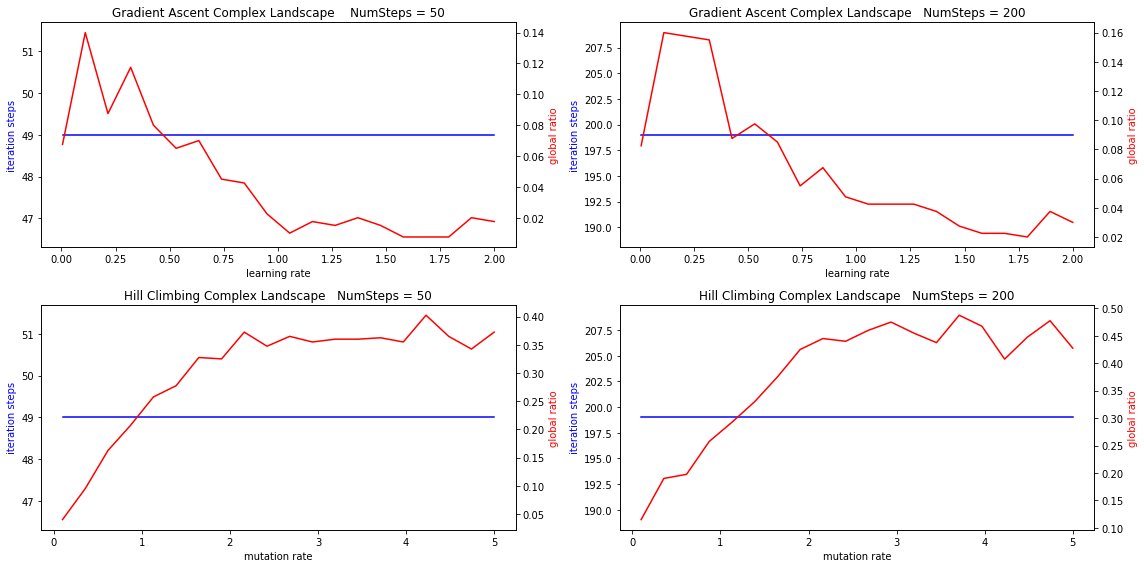

In [258]:
plt.subplots(nrows=2, ncols=2,figsize=(16, 8))

total_starting_points = 400
n_learn_rates = 20
mean_iters = np.zeros(n_learn_rates)
global_ratios = np.zeros(n_learn_rates)

NumSteps = 50
ax1 = plt.subplot(2, 2, 1)
learning_rates = np.linspace(0.005,2,n_learn_rates)
description = 'Gradient Ascent Complex Landscape    NumSteps = 50'
plotIterGlobalRate(GradAscentComplex, learning_rates,description,'learning rate',True)

NumSteps = 200
ax1 = plt.subplot(2, 2, 2)
learning_rates = np.linspace(0.005,2,n_learn_rates)
description = 'Gradient Ascent Complex Landscape   NumSteps = 200'
plotIterGlobalRate(GradAscentComplex, learning_rates,description,'learning rate',True)

NumSteps = 50
ax1 = plt.subplot(2, 2, 3)
mutation_rates = np.linspace(0.1,5,n_learn_rates)
description = 'Hill Climbing Complex Landscape   NumSteps = 50'
plotIterGlobalRate(HillClimbComplex, mutation_rates,description, 'mutation rate',True)

NumSteps = 200
ax1 = plt.subplot(2, 2, 4)
mutation_rates = np.linspace(0.1,5,n_learn_rates)
description = 'Hill Climbing Complex Landscape   NumSteps = 200'
plotIterGlobalRate(HillClimbComplex, mutation_rates,description, 'mutation rate',True)

plt.tight_layout()

### Tolerance Parameter 
The global maximum is defined as a value higher than 9 so that states that are covered by the basins of attraction of 8.8 are not taken into consideration. The next higher basins of attraction is the hill with the global maximum. 

### Set-up
- blue line: the number of iterations is a straight line because the algorithms iterate until NumSteps is reached. 
- red line:  global ratio = number of global maximum / all states (400)

### Analysis 
- The graphs confirm the statements based on the heatmap that gradient ascent is performing better with a smaller learning rate such as 0.01. 
- A higher mutation rate is performing better until the global ratio stagnates at around a mutation rate of 2
- More iterations result in general in a higher global ratio since more states reach a basin of attraction of a attractor with a value higher than 9. 

### Recommendation 
Hill climbing is more likely to reach the peak of the hill and therefore is more suitable for the complex landscape than gradient ascent.

In [4]:
# MCMCS Coursework 1
# Luc Berthouze 2017-10-25

# Definition of Complex landscape
def ComplexLandscape(x, y):
    return 4*(1-x)**2*np.exp(-(x**2)-(y+1)**2) -15*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2)\
    -(1./3)*np.exp(-(x+1)**2 - y**2) -1*(2*(x-3)**7 -0.3*(y-4)**5+(y-3)**9)*np.exp(-(x-3)**2-(y-3)**2)

# Definition of gradient of Complex landscape
def ComplexLandscapeGrad(x, y):
    g = np.zeros(2)
    g[0]=-8* np.exp(-(x**2)-(y+1)**2)*((1-x)+x*(1-x)**2)-15* np.exp(-x**2-y**2)*((0.2-3*x**2)\
    -2*x*(x/5 - x**3 - y**5)) +(2./3)*(x+1)* np.exp(-(x+1)**2 - y**2)\
    -1* np.exp(-(x-3)**2-(y-3)**2)*(14*(x-3)**6-2*(x-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    
    g[1]=-8*(y+1)*(1-x)**2* np.exp(-(x**2)-(y+1)**2) -15* np.exp(-x**2-y**2)*(-5*y**4 -2*y*(x/5 - x**3 - y**5))\
    +(2./3)*y*np.exp(-(x+1)**2 - y**2)-1* np.exp(-(x-3)**2-(y-3)**2)*((-1.5*(y-4)**4+9*(y-3)**8)\
    -2*(y-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    return g
    
# Definition of Simple landscape
def SimpleLandscape(x, y):
    return np.where(1-np.abs(2*x)>0,1-np.abs(2*x)+x+y,x+y)
    
# Definition of gradient of Simple landscape
def SimpleLandscapeGrad(x, y):
    g = np.zeros(2)
    if 1 - np.abs(2 * x) > 0:
        if x < 0:
            g[0] = 3
        elif x == 0:
            g[0] = 0
        else:
            g[0] = -1
    else:
        g[0] = 1
    g[1] = 1
    return g

# Function to draw a surface (equivalent to ezmesh in Matlab)
# See argument cmap of plot_surface instruction to adjust color map (if so desired)
def DrawSurface(fig, varxrange, varyrange, function):
    """Function to draw a surface given x,y ranges and a function."""
    #ax = fig.gca(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('height')
    xx, yy = np.meshgrid(varxrange, varyrange, sparse=False)
    z = function(xx, yy)
    plt.hold(True)
    if function == ComplexLandscape:
        ax.plot_surface(xx, yy, z, cmap='plasma',alpha=0.3) # color map can be adjusted, or removed! 
    else:
        ax.plot_surface(xx, yy, z, cmap='plasma',alpha=0.5) # color map can be adjusted, or removed! 

    fig.canvas.draw()
    return ax


def GradAscent(StartPt,NumSteps,LRate, enable_scatter):
    
    globalOptimumReached = 0
    for i in range(NumSteps):
        
        height = SimpleLandscape(StartPt[0],StartPt[1])
        
        if enable_scatter:
            ax.scatter(StartPt[0],StartPt[1],height,s=50)

        grad = SimpleLandscapeGrad(StartPt[0],StartPt[1])
        
        StartPt = StartPt + LRate * grad;
      
        StartPt = np.maximum(StartPt,[-2,-2])
        StartPt = np.minimum(StartPt,[2,2])
        
        if height >= 4:
            globalOptimumReached = 1
            return i, globalOptimumReached, height 
        
    return i, globalOptimumReached, height

def GradAscentComplex(StartPt,NumSteps,LRate, enable_scatter):
    
    globalReached = 0
    for i in range(NumSteps):
        
        height = ComplexLandscape(StartPt[0],StartPt[1])
        
        if enable_scatter:
            ax.scatter(StartPt[0],StartPt[1],height,s=50)

        grad = ComplexLandscapeGrad(StartPt[0],StartPt[1])
        
        StartPt = StartPt + LRate * grad;
       
        StartPt = np.maximum(StartPt,[-3,-3])
        StartPt = np.minimum(StartPt,[7,7])
        
        if height > 9:
            globalReached = 1
               
    return i, globalReached,height 
 

# Returns a mutated point given the old point and the range of mutation
def Mutate(OldPt,MaxMutate):
    # TO DO: Select a random distance MutDist to mutate in the range (-MaxMutate,MaxMutate)
    MutDist = random.uniform(-MaxMutate,MaxMutate)
    randIndex = random.randint(0,1)
    OldPt[randIndex] += MutDist
    return OldPt
    

def HillClimb(StartPt,NumSteps,MaxMutate, enable_scatter):
    
    globalOptimumReached = 0
    for i in range(NumSteps):
      
        height = SimpleLandscape(StartPt[0],StartPt[1])

        if enable_scatter:
            ax.scatter(StartPt[0],StartPt[1],height,s=50)
        
        NewPt = Mutate(np.copy(StartPt),MaxMutate) 
        
        NewPt = np.maximum(NewPt,[-2,-2])
        NewPt = np.minimum(NewPt,[2,2])
              
        newHeight = SimpleLandscape(NewPt[0],NewPt[1])
         
        if newHeight > height:
            StartPt = NewPt
            
        if newHeight >= 4:
            globalOptimumReached = 1
            return i, globalOptimumReached, newHeight
      
    return i, globalOptimumReached, newHeight


def HillClimbComplex(StartPt,NumSteps,MaxMutate, enable_scatter):
    
    globalReached = 0
    for i in range(NumSteps):
      
        height = ComplexLandscape(StartPt[0],StartPt[1])

        if enable_scatter:
            ax.scatter(StartPt[0],StartPt[1],height,s=50)
        
        NewPt = Mutate(np.copy(StartPt),MaxMutate) 
        
        NewPt = np.maximum(NewPt,[-3,-3])
        NewPt = np.minimum(NewPt,[7,7])
               
        newHeight = ComplexLandscape(NewPt[0],NewPt[1])
         
        if newHeight > height:
            StartPt = NewPt
            
        if newHeight > 9:
            globalReached = 1
            
            
    return i, globalReached, height

plt.ion()
NumSteps=50
LRate=0.1
MaxMutate=1
enableScatter = True